---
layout: page
title: Testes - Conceitos Avan√ßados
nav_order: 13
---

[<img src="./colab_favicon_small.png" style="float: right;">](https://colab.research.google.com/github/icd-ufmg/icd-ufmg.github.io/blob/master/_lessons/13-poder.ipynb)


# Testes - Conceitos Avan√ßados
{: .no_toc .mb-2 }

Explorar conceitos como poder e tipos de erro
{: .fs-6 .fw-300 }

{: .no_toc .text-delta }
Resultados Esperados

1. Entendimento de erros tipo 1 e tipo 2
1. Entendimento de poder de testes
1. Entendimento de *p-hacking*

---
**Sum√°rio**
1. TOC
{:toc}
---

In [1]:
# -*- coding: utf8

from scipy import stats as ss

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.style.use('seaborn-colorblind')

plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [3]:
plt.ion()

In [4]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

## Introdu√ß√£o

Usando dados que existem publicamente, um professor de Computa√ß√£o tentou fazer uso de testes de hip√≥teses para verificar uma lenda francesa de que existem mais nascimentos em dias de lua cheia.

Os dados podem ser coletados abaixo, aqui vamos fazer uso das estat√≠sticas j√° computadas.

1. Nascimentos por dia na Fran√ßa https://insee.fr/fr/statistiques/fichier/2904770/T79jnais.xls
1. Dias de Lua Cheia https://www.timeanddate.com/moon/phases/france/paris

### Primeiro Teste

Ao filtrar os dados (at√© 31 de Dezembro de 2016), o professor formulou na sua hip√≥tese. A mesma foi feita com base na seguinte intui√ß√£o. Para ter alguma evid√™ncia da lenda acima, a fra√ß√£o de crian√ßas que nascem em dias de lua cheia, $p_{\text{nasc_lua_cheia}}$, tem que ser estatisticamente diferente (na verdade maior) do que a fra√ß√£o de dias de lua cheia, $p_{\text{lua_cheia}}$. A ideia aqui √© a seguinte. Caso os nascimentos sejam uniformemente distribu√≠dos nos dias, independente de lua cheias ou n√£o, $p_{\text{nasc_lua_cheia}} = p_{\text{lua_cheia}}$. O Diagrama abaixo mostra essa ideia, observe como caso tenhamos o mesmo n√∫mero independente de dias, as fra√ß√µes s√£o iguais.

```
[ lua cheia ] [ dia normal ] [ dia normal ] [ lua cheia ] [ dia normal ]
[ 100 nasc  ] [ 100 nasc   ] [ 100 nasc   ] [ 100 nasc  ] [ 100 nasc   ]
```

Acima, $ p_{\text{lua_cheia}} = 2 / 5$. Assim como, $p_{\text{nasc_lua_cheia}} = 200 / 500 = 2 / 5$. Ou seja tudo √© igual. Agora, caso existam mais nascimentos em dias de lua cheia, as fra√ß√µes ficam desbalanceadas.

```
[ lua cheia ] [ dia normal ] [ dia normal ] [ lua cheia ] [ dia normal ]
[ 120 nasc  ] [ 100 nasc   ] [ 100 nasc   ] [ 120 nasc  ] [ 100 nasc   ]
```

Existem algumas problemas filos√≥ficos com a ideia acima. Uma quantidade √© uma fra√ß√£o de nascimentos, a outra quantidade √© uma fra√ß√£o de dias. De qualquer forma, como fra√ß√µes n√£o tem unidade, podemos comparar as duas. Vamos em frente ent√£o. O professor ent√£o decide escrever sua hip√≥tese nula:

* H0: $p_{\text{lua_cheia}} = p_{\text{nasc_lua_cheia}}$


Pare para pensar qual o impacto de rejeitar esta nula? Uma das fra√ß√µes √©, estatisticamente falando, maior do que a outra. Mostrando **evid√™ncia** de que existem mais ou menos nascimentos em dias de lua cheia. Agora vamos fazer as contas. Existem $606$ dias de lua cheia. Al√©m do mais, existem outros $17292$ dias sem lua cheia nos dados acima. Assim, a probabilidade de nascer em um dia de lua cheia √©:

$p_{\text{lua_cheia}} = \frac{606}{17292 + 606} = 0.033858531679517266$

Al√©m do mais, nos dias de lua cheia nasceram $1,295,426$ crian√ßas. Nos outros dias nasceram $36,715,887$ crian√ßas.

$p_{\text{nasc_lua_cheia}} = \frac{1295426}{1295426 + 36715887} = 0.034080011916452345$

As vari√¢ncias (e desvios padr√µes) s√£o facilmente aproximadas via $p(1-p)$. Com tais dados em m√£o, o professor rapidamente computou os ICs dos nascimentos em dias de lua cheia!

In [5]:
n = 1295426 + 36715887
p = 1295426 / n
s = np.sqrt(p * (1 - p)) # desvio, raiz da var

print(p)
print(p - 1.96 * s / np.sqrt(n))
print(p + 1.96 * s / np.sqrt(n))

0.034080011916452345
0.03402233260315983
0.03413769122974486


$I_{\text{lua}} = (0.0340, 0.0341)$

Assim ele pensou, claramente tal IC vai capturar $p_{\text{lua_cheia}}$:

In [6]:
n = 17292 + 606
p = 606 / n
print(p)

0.033858531679517266


Plotando a distribui√ß√£o amostral (sem bootstrap, mas como √© uma m√©dia seria o mesmo resultado)

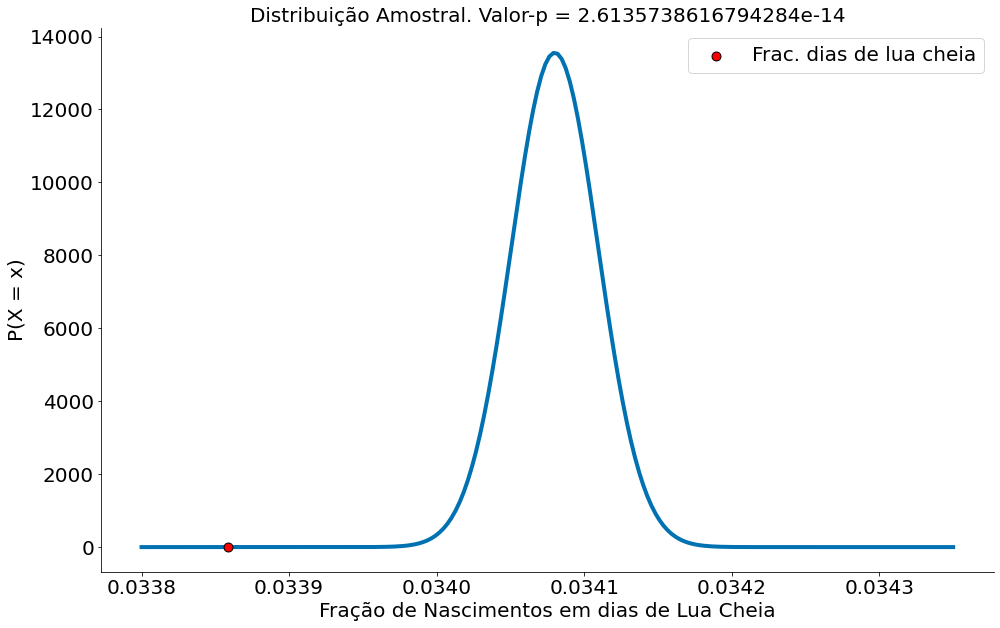

In [7]:
n = 1295426 + 36715887
p = 1295426 / n
s = np.sqrt(p * (1 - p))

mu_amostral = p
sd_amostral = s / np.sqrt(n)
dist_amostral = ss.distributions.norm(loc=p, scale=sd_amostral)


x = np.linspace(0.0338, 0.03435, 200)
plt.plot(x, dist_amostral.pdf(x=x), zorder=1)

obs = [0.033858531679517266] #observado: dias de lua cheia
p_obs = dist_amostral.pdf(x=obs)
plt.scatter(obs, p_obs, color='red', edgecolor='k', zorder=2, s=80, label='Frac. dias de lua cheia')
plt.ylabel('P(X = x)')
plt.xlabel('Fra√ß√£o de Nascimentos em dias de Lua Cheia')
p_val = dist_amostral.cdf(obs[0])
plt.title('Distribui√ß√£o Amostral. Valor-p = {}'.format(p_val))
plt.legend()
despine()

**Erramos!** Parece que, estatisticamente, existem mais nascimentos em dias de lua cheia! O IC n√£o captura a outra fra√ß√£o. Lendo da forma correta:

*Caso fosse poss√≠vel replicar os nascimentos nos n = 38M (quase 38 milh√µes) de nascimentos, em 95% dos casos a fra√ß√£o de nascimentos de crian√ßas n√£o vai incluir o valor 0.033 (fra√ß√£o de dias de lua cheia). Assim, parece que uma fra√ß√£o √© maior do que a outra, mostrando que evid√™ncias que existem mais nascimentos em dias de luas cheia (vide diagramas acima).*

Antes de continuar, √© importante dizer que existem v√°rios problemas com essa abordagem. Segue alguns:

1. Observamos o IC apenas de uma fra√ß√£o. Ao fazer o IC da outra fra√ß√£o a resposta muda! Qual o motivo?!
1. Mesmo o teste rejeitando a nula, a diferen√ßa √© quase nada!!! Ser√° que queremos isto!
   1. Sendo justo, o professor fez o teste mais corretamente do que compartivo de ICs. Mas n√£o quis replicar aqui por brevidade.
1. Estamos comparando fra√ß√µes de coisas diferentes!

O terceiro problema ser√° resolvido abaixo. O primeiro e segundo ser√£o abordados depois.

### Segundo Teste: Mais Correto!

Existem $606$ dias de lua cheia. Al√©m do mais, existem $1,295,426$ nascimentos em tais dias. Assim, o n√∫mero esperado de nascimentos em dias de lua cheia √© de:

$\bar{x}_{\text{lua}} = \frac{1295426}{606} = 2137$

Nos outros dias nasceram $36,715,887$ crian√ßas num total de $17,292$, assim:

$\bar{x}_{\text{outros}} = \frac{36715887}{17292} = 2123$

Note que aqui nos dois casos eu estou com NASCIMENTOS POR DIAS. Mesma unidade. Os desvios padr√µes dos dados s√£o:

$s_{\text{lua}} = 57585$

$s_{\text{outros}} = 59232$

Com tais dados em m√£o, o professor rapidamente computou os ICs.

In [8]:
2137 - 1.96 * 57585 / np.sqrt(606)

-2447.892215345594

In [9]:
2137 + 1.96 * 57585 / np.sqrt(606)

6721.892215345594

$I_{\text{lua}} = (-2447, 6721)$

Da mesma forma, fez as contas para os dias sem lua.

In [10]:
print(2123 - 1.96 * 59232 / np.sqrt(17292))
print(2123 + 1.96 * 59232 / np.sqrt(17292))

1240.1440363518727
3005.8559636481273


$I_{\text{outros}} = (1240, 3005)$

Aqui, independente da dire√ß√£o um IC captura a m√©dia do outro. UFA!

Agora ainda podemos nos perguntar, qual o motivo do primeiro teste falhar? Matematicamente, nada foi feito da forma errada. O argumento de comparar fra√ß√µes √© estranho mas √© v√°lido. Vamos entender abaixo.

Antes disto, para finalizar, segue a amostral!

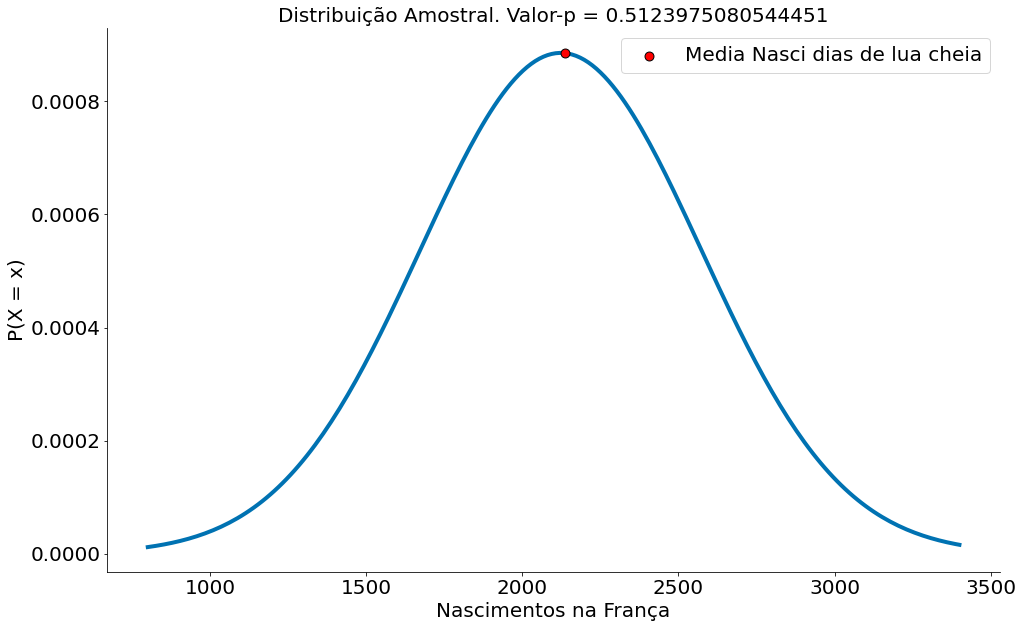

In [11]:
mu_amostral = 2123
sd_amostral = 59232 / np.sqrt(17292)
dist_amostral = ss.distributions.norm(loc=mu_amostral, scale=sd_amostral)


x = np.linspace(800, 3400, 200)
plt.plot(x, dist_amostral.pdf(x=x), zorder=1)

obs = [2137] #observado
p_obs = dist_amostral.pdf(x=obs)
plt.scatter(obs, p_obs, color='red', edgecolor='k', zorder=2, s=80, label='Media Nasci dias de lua cheia')
plt.ylabel('P(X = x)')
plt.xlabel('Nascimentos na Fran√ßa')
p_val = dist_amostral.cdf(obs[0])
plt.title('Distribui√ß√£o Amostral. Valor-p = {}'.format(p_val))
plt.legend()
despine()

## Poder de Testes

Para entender o problema do comparativo inicial (o de fra√ß√µes), vamos relembrar do caso mais simples de moedas viesadas e n√£o viesadas. Em particular, vamos assumir um lan√ßamento de 100 moedas. Isto √©, vamos contar quantas vezes as mesmas caem em cara.

Como j√° falamos, tais dados podem ser modelados por uma Binomial. Sendo $p$ a propor√ß√£o de caras e $n$ o n√∫mero de vezes que lan√ßo a moeda:

$$k \sim Binomial(p, n)$$

Ou seja, podemos amostrar o n√∫mero de caras $k$ usando uma Binomial.

In [12]:
N = 100
alpha = 0.05

Usando o c√≥digo da Binomial em Python, temos v√°rias fun√ß√µes que nos ajuda. Uma delas define qual √© o intervalo onde caem 95% dos lan√ßamentos. Ent√£o, esta √© a faixa esperada de uma moeda n√£o viesada ($p=.5$).

In [13]:
lower, upper = ss.binom.interval(1 - alpha, N, 0.5)
(lower, upper)

(40.0, 60.0)

Abaixo vemos alguns plots:
1. 95% dos casos na regi√£o verde
1. 5% na vermelha

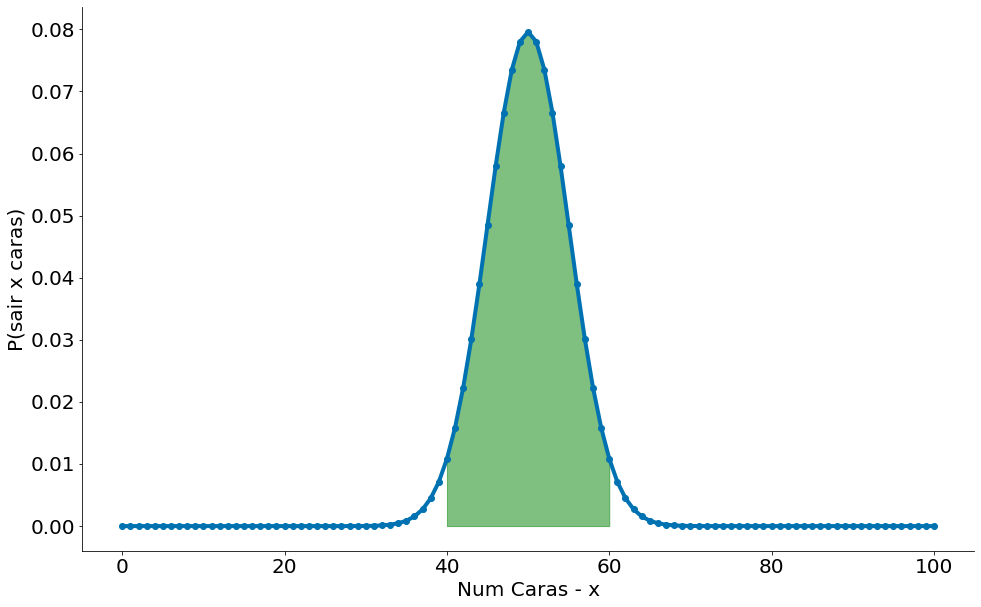

In [14]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x, N, 0.5)
plt.plot(x, prob_binom, 'o-')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(40, 61) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x2, N, 0.5)
plt.fill_between(x2, prob_binom, color='g', alpha=0.5)

despine()

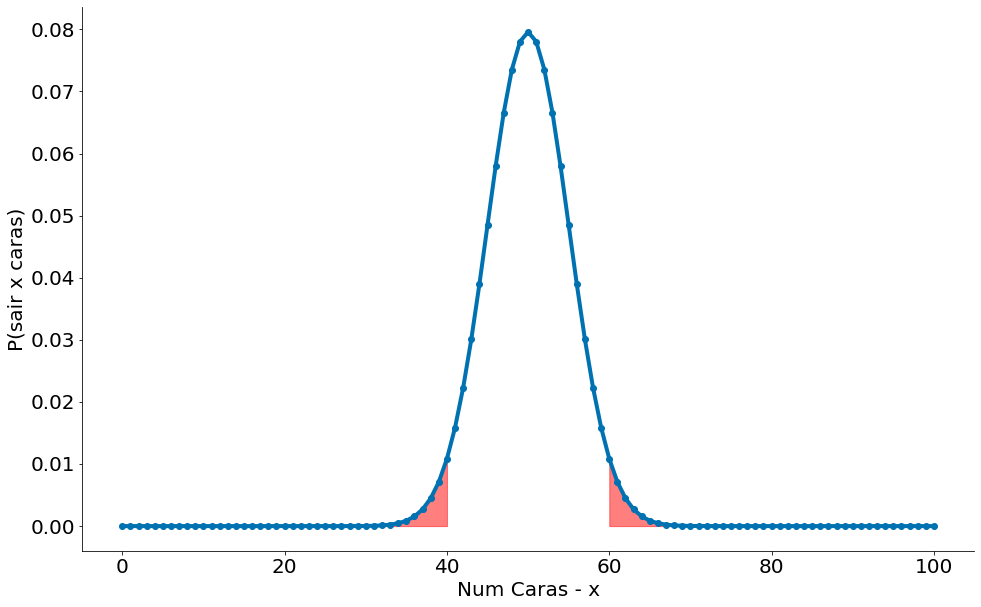

In [15]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x, N, 0.5)
plt.plot(x, prob_binom, 'o-')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(60, 100) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x2, N, 0.5)
plt.fill_between(x2, prob_binom, color='r', alpha=0.5)

x3 = np.arange(0, 41) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x3, N, 0.5)
plt.fill_between(x3, prob_binom, color='r', alpha=0.5)

despine()

## Tipos de Erros

Vamos agora definir nossa hip√≥tese nula:

$H_0$: **p == 0.5**

Ao realizar um experimento, lan√ßar algumas moedas para cima, caso eu rejeite $H_0$ tenho evid√™ncia de que a moeda n√£o √© justa (n√£o-viesada). Precisamos tomar uma decis√£o sobre a *signific√¢ncia*, que mede o quanto estamos dispostos a cometer um *erro do tipo 1* (‚Äúfalso positivo‚Äù), no qual rejeitamos $H_0$, embora ela seja verdade.Vamos escolher $5\%$ (ver slides sobre a discuss√£o de Fisher).

Considere o teste que rejeita $H_0$ se $X$ estiver fora dos limites dados por: (40, 60). Ver plots acima. Para entender um erro do tipo 1, considere a figura abaixo que compara noessa moeda com outra onde $p=0.6$. A regi√£o rosa consiste de mais ou menos $50%$ dos casos desta moeda. Note que tais casos todos caem no intervalo de $2.5\%$ (para a direita, maior, metade de $5\%$). Podemos errar, mas esperamos bem mais vezes $50\%$ de que a moeda injusta caia no intervalo. 

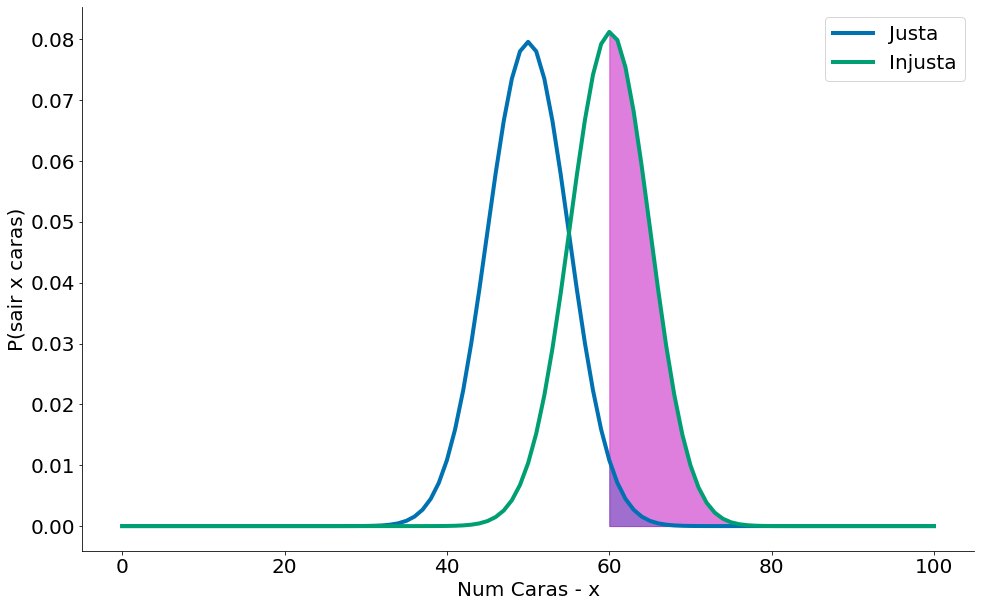

In [16]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom_fair = ss.distributions.binom.pmf(x, N, 0.5)
prob_binom_unfair = ss.distributions.binom.pmf(x, N, 0.6)
plt.plot(x, prob_binom_fair, label='Justa')
plt.plot(x, prob_binom_unfair, label='Injusta')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(60, 100) # Valores no eixo x
fill_prob_binom_fair = ss.distributions.binom.pmf(x2, N, 0.5)
plt.fill_between(x2, fill_prob_binom_fair, color='c', alpha=0.5)

fill_prob_binom_unfair = ss.distributions.binom.pmf(x2, N, 0.6)
plt.fill_between(x2, fill_prob_binom_unfair, color='m', alpha=0.5)

plt.legend()
despine()

Portanto, assumindo que $p$ √© realmente igual a $0.5$ (ou seja, $H_0$ √© verdade), h√° apenas $5\%$ de chance de observarmos um $X$ que est√° fora desse intervalo, que √© o significado exato que quer√≠amos. Dito de forma diferente, se $H_0$ for verdadeiro, ent√£o, aproximadamente $19$ vezes de $20$ este teste dar√° o resultado correto.

Tamb√©m estamos frequentemente interessados no *poder* (ou *power*) de um teste, que √© a probabilidade de n√£o cometer um *erro do tipo 2*, em que n√£o podemos rejeitar $H_0$, mesmo ela sendo falsa. Para medir isso, temos que especificar o que √© exatamente $H_0$ ser falsa. (Saber apenas que $p$ n√£o √© $0.5$ n√£o fornece muitas informa√ß√µes sobre a distribui√ß√£o de $X$.) Em particular, vamos verificar o que acontece se $p$ for, na verdade, $0.06$, de modo que a moeda seja ligeiramente tendenciosa a dar "cara". Nesse caso, gostar√≠amos de rejeitar $H_0$.

Tal erro, capturado $\beta$, pode ser ilustrado na regi√£o onde a moeda viesada cai no intervalo (40, 60). Aqui, uma moeda viesada parece justa!

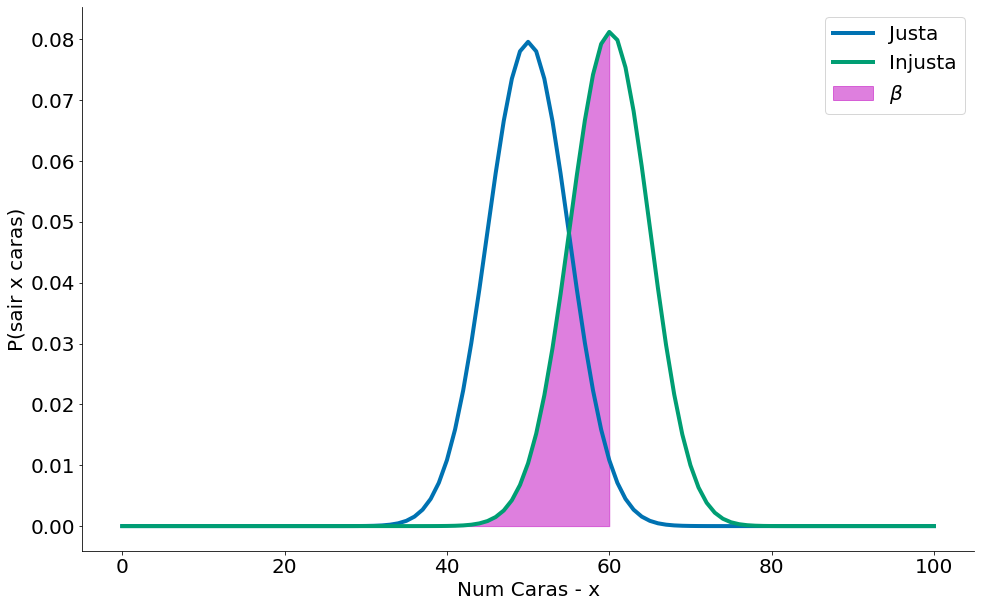

In [17]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom_fair = ss.distributions.binom.pmf(x, N, 0.5)
prob_binom_unfair = ss.distributions.binom.pmf(x, N, 0.6)
plt.plot(x, prob_binom_fair, label='Justa')
plt.plot(x, prob_binom_unfair, label='Injusta')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(40, 61) # Valores no eixo x
fill_prob_binom_unfair = ss.distributions.binom.pmf(x2, N, 0.6)
plt.fill_between(x2, fill_prob_binom_unfair, color='m', alpha=0.5, label=r'$\beta$')

plt.legend()
despine()

Usando a CDF, poemos ver tais chances.! Em particular queremos:

$P(X <= 60) - P(x <= 40)$

In [18]:
beta = ss.binom.cdf(upper, N, 0.6) - ss.binom.cdf(lower, N, 0.6)
beta

0.5378821927269787

x = np.arange(0, 101) # Valores no eixo x
y = ss.binom.cdf(x, N, 0.6)
plt.plot(x, y)
plt.xlabel('Num Caras - x')
plt.ylabel('P(X < x)')

x2 = np.arange(40, 61) # Valores no eixo x
fill = ss.binom.cdf(x2, N, 0.6)
plt.fill_between(x2, fill, color='m', alpha=0.5, label=r'$\beta$')

O poder √© dado por 1-$\beta$.

In [19]:
1 - beta

0.4621178072730213

As an√°lises acima indicam que, quando a moeda for tendenciosa com ùëù=0.6, 53% das vezes a vari√°vel ùëã ter√° um valor dentro do intervalo [40,60]. Em outras palavras, o nosso teste vai rejeitar ùêª0 corretamente quando ùëù=0.6.

Observe que o valor de $\beta$ √© bem menor (quase zero) quando uma moeda √© muito viesada. Outra forma de ver √© que temos muito poder $1-\beta$.

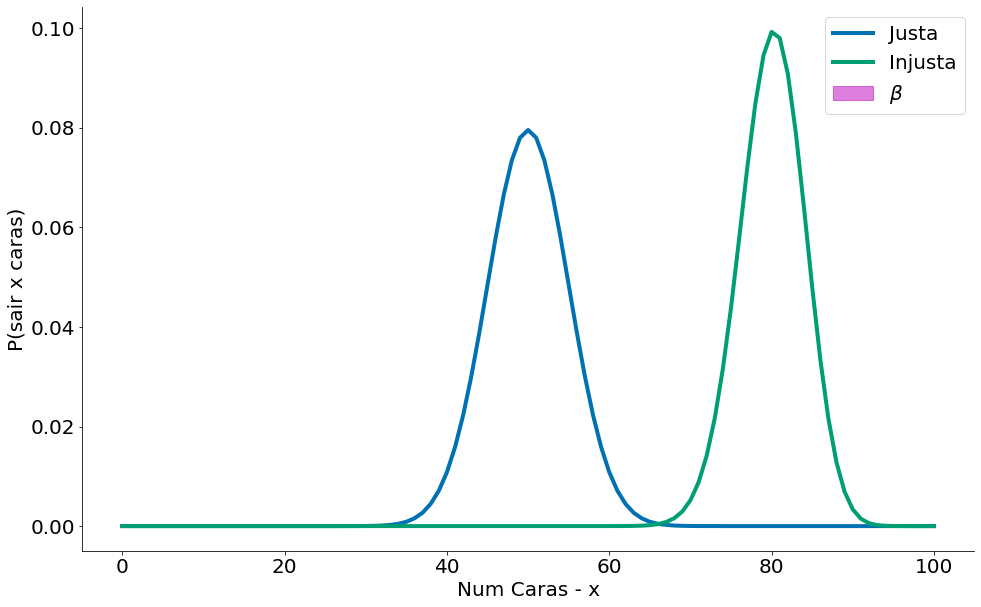

In [20]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom_fair = ss.distributions.binom.pmf(x, N, 0.5)
prob_binom_unfair = ss.distributions.binom.pmf(x, N, 0.8)
plt.plot(x, prob_binom_fair, label='Justa')
plt.plot(x, prob_binom_unfair, label='Injusta')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(40, 61) # Valores no eixo x
fill_prob_binom_unfair = ss.distributions.binom.pmf(x2, N, 0.8)
plt.fill_between(x2, fill_prob_binom_unfair, color='m', alpha=0.5, label=r'$\beta$')

plt.legend()
despine()

Definindo uma fun√ß√£o power (abaixo), podemos agora explorar melhor o poder para diferentes moedas viesadas.

In [21]:
def power(alt, n):
    lower, upper = ss.binom.interval(1 - 0.05, n, 0.5)
    beta = ss.binom.cdf(upper, n, alt) - ss.binom.cdf(lower, n, alt)
    return 1 - beta

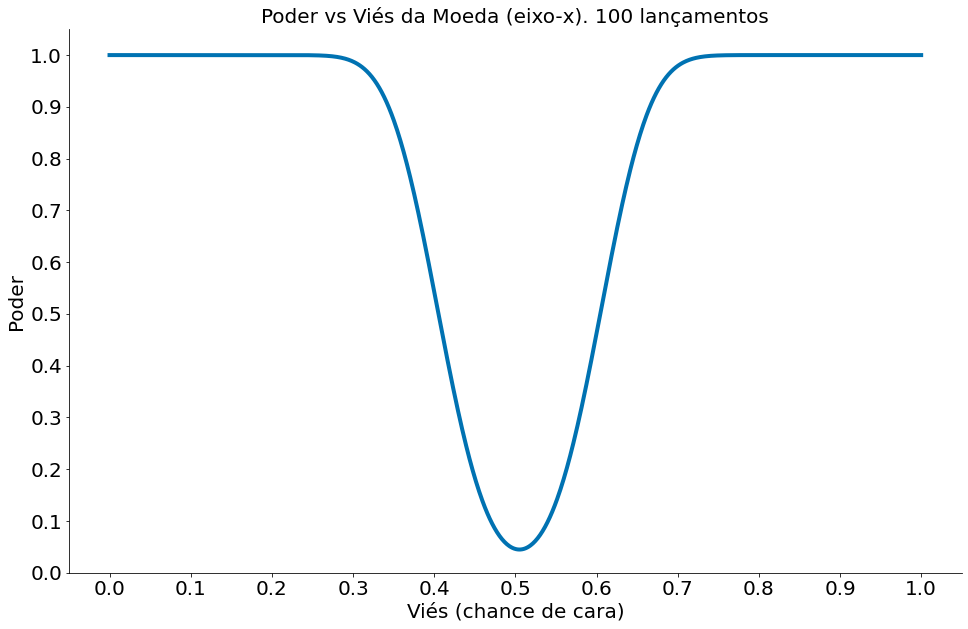

In [22]:
fig, ax = plt.subplots(1, 1)
ax.set_title('Poder vs Vi√©s da Moeda (eixo-x). 100 lan√ßamentos')

def plot_power(n, ax, **kwargs):
    alternativas = np.linspace(0, 1, 1000)
    ax.plot(alternativas, power(alternativas, n), **kwargs)
    ax.set_xticks(np.arange(0,1.1, 0.1))
    ax.set_yticks(np.arange(0,1.1, 0.1))
    ax.set_ybound((0, 1.05))
    ax.set_ylabel('Poder')
    ax.set_xlabel('Vi√©s (chance de cara)')
    
plot_power(N, ax)
despine()

Como esperado, temos muito mais poder quando estamos mais longe de $p=0.5$. Isto √© o nosso efeito. Ao sumarizar um teste de hip√≥teses, √© bom ver qual √© a dist√¢ncia entre o observado e o esperado (no modelo nulo). Posso dizer chegar em conclus√µes erradas para uma moeda onde $p=0.51$. 

Um outro fator importante √© que quanto maior nossos dados mais poder. Ou seja, mais chances de dizer $p=0.51$ √© viesado. Por√©m qual o efeito pr√°tico disto? Moedas n√£o viesadas existem apenas na teoria.

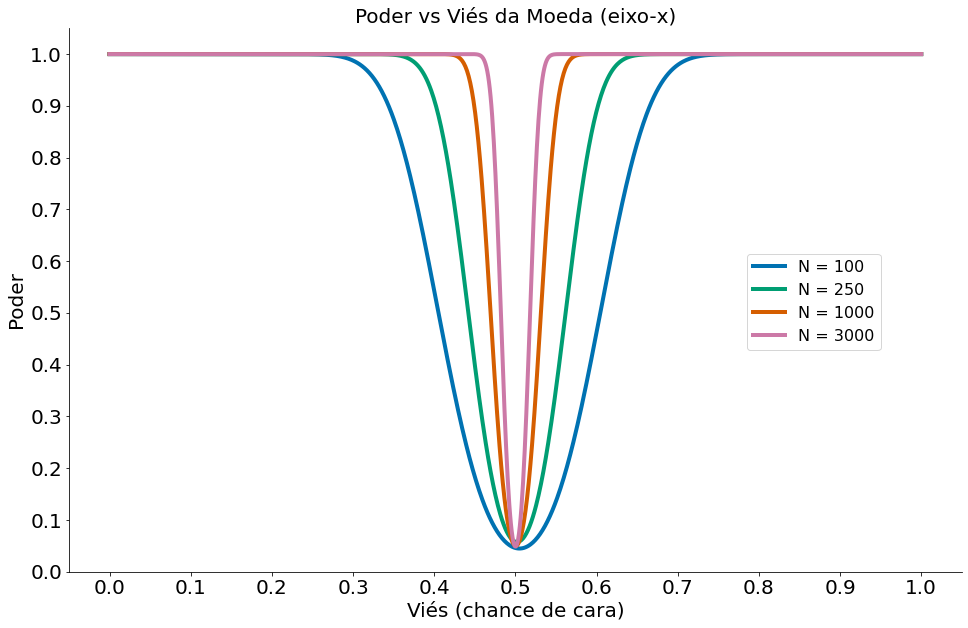

In [23]:
fig, ax = plt.subplots(1, 1)

def plot_powers(ax):
    ax.set_title('Poder vs Vi√©s da Moeda (eixo-x)')
    plot_power(100, ax,  label="N = 100")
    plot_power(250, ax,  label="N = 250")
    plot_power(1000, ax, label="N = 1000")
    plot_power(3000, ax, label="N = 3000")
    ax.legend(bbox_to_anchor=(0.75, 0.6), loc=2, prop={'size':16})
    
plot_powers(ax)
despine()

Podemos ver como mais dados aumenta o poder. Compare o caso abaixo com o caso com 100 lan√ßamentos!

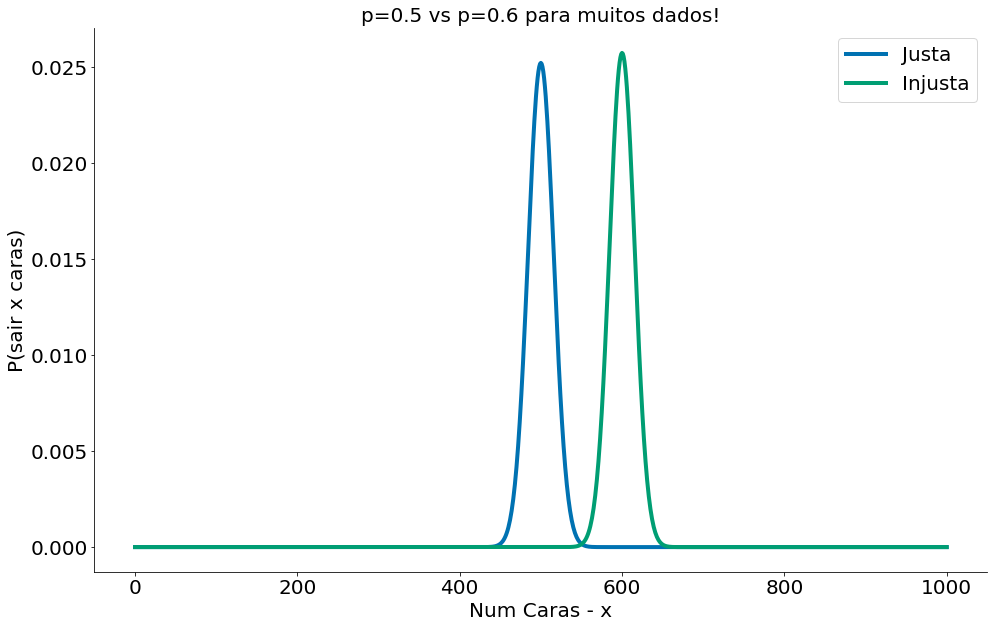

In [24]:
x = np.arange(0, 1001) # Valores no eixo x
prob_binom_fair = ss.distributions.binom.pmf(x, 1000, 0.5)
prob_binom_unfair = ss.distributions.binom.pmf(x, 1000, 0.6)
plt.plot(x, prob_binom_fair, label='Justa')
plt.plot(x, prob_binom_unfair, label='Injusta')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

plt.title('p=0.5 vs p=0.6 para muitos dados!')
plt.legend()
despine()

## Com Dados

Vamos fazer uso da mesma base de dados da aula de causalidade para explorar o conceito. Nesta base temos um teste A/B com um grupo de Teste e outro de Controle. Lembrando que 1.0 indica cura. Ou seja, queremos que o grupo de Teste (medicados) tenha um valor maior de 1s.

Abaixo pego os dados.

In [25]:
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/13-CausalidadeRCT/bta.csv')
df.head()

Group  Result
0  Control     1.0
1  Control     1.0
2  Control     0.0
3  Control     0.0
4  Control     0.0

Grupo de Controle

In [26]:
control = df.query('Group == "Control"')
control.head()

Group  Result
0  Control     1.0
1  Control     1.0
2  Control     0.0
3  Control     0.0
4  Control     0.0

Grupo de Teste

In [27]:
medicados = df.query('Group != "Control"')
medicados.head()

Group  Result
16  Treatment     1.0
17  Treatment     1.0
18  Treatment     1.0
19  Treatment     1.0
20  Treatment     1.0

Com a m√©dia de desvio padr√£o dos grupo √© poss√≠vel criar a distribui√ß√£o amostral. Abaixo vamos ver as duas distribui√ß√µes.

In [28]:
mu_ctrl = control['Result'].mean()
std_ctrl = control['Result'].std(ddof=1)

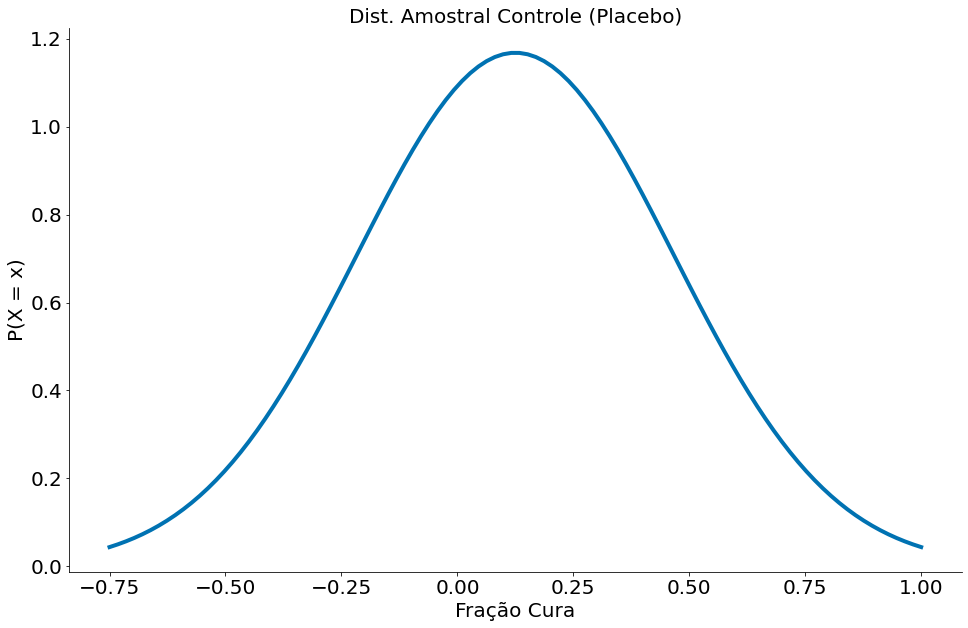

In [29]:
import scipy.stats as ss

x = np.linspace(-0.75, 1, 100)
y = ss.distributions.norm.pdf(loc=mu_ctrl, scale=std_ctrl, x=x)
plt.plot(x, y)
plt.xlabel('Fra√ß√£o Cura')
plt.ylabel('P(X = x)')
plt.title('Dist. Amostral Controle (Placebo)')
despine()

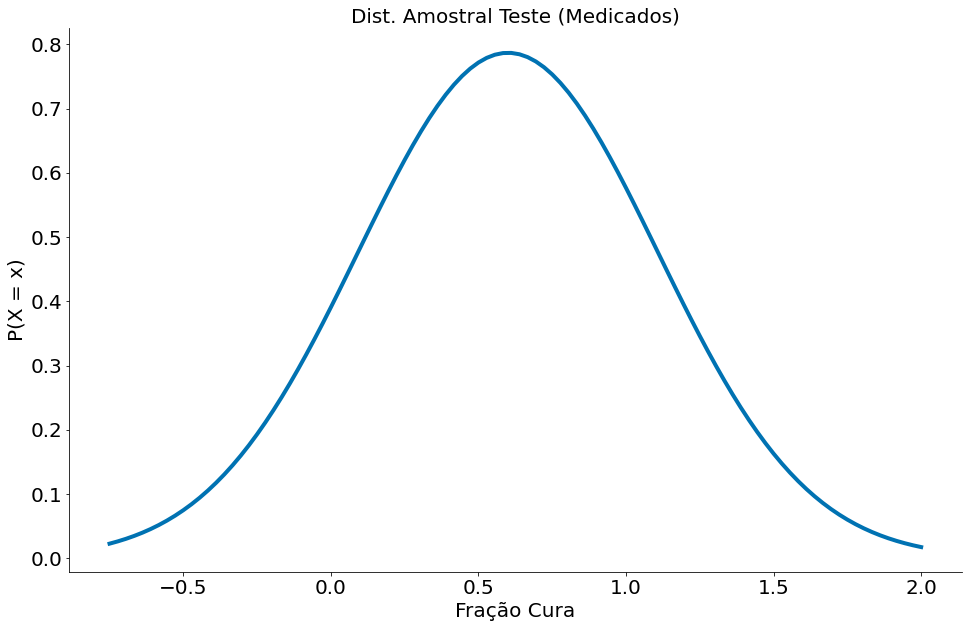

In [30]:
mu_med = medicados['Result'].mean()
std_med = medicados['Result'].std(ddof=1)

x = np.linspace(-0.75, 2, 100)
y = ss.distributions.norm.pdf(loc=mu_med, scale=std_med, x=x)
plt.title('Dist. Amostral Teste (Medicados)')
plt.plot(x, y, label='Medicados')
plt.xlabel('Fra√ß√£o Cura')
plt.ylabel('P(X = x)')
despine()

Agora vamos plotar as duas e mensurar o poder. Nesta base, observamos tal m√©dia para o grupo de medicados.

In [31]:
mu_med

0.6

A m√©dia para os dados de controle √©:

In [32]:
mu_ctrl

0.125

Vamos criar uma hip√≥tese.

* H0: 0.125 < 0.6. Ou seja, a m√©dia do grupo de CONTROLE √© ESTATISTICAMENTE MENOR do que a m√©dia do TESTE.

Podemos observar qual a regi√£o de ACEITA√á√ÉO desta nula. Basta plotar a distribui√ß√£o amostral do grupo de controle e a regi√£o onde caiem 95% dos dados. O plot segue abaixo. Parece que o IC dp grupo de controle vai at√© 0.45. Ou seja, valores observados de teste AL√âM deste rejeitam a nula.

*Existe um erro aqui que valores abaixo de zero a acima de um n√£o seriam esperados, mas vamos ignorar tal problema. Podemos truncar a ajustar as distribui√ß√µes para serem Normais truncadas, mas isso mudaria um pouco nosso entendimento do TCL.*

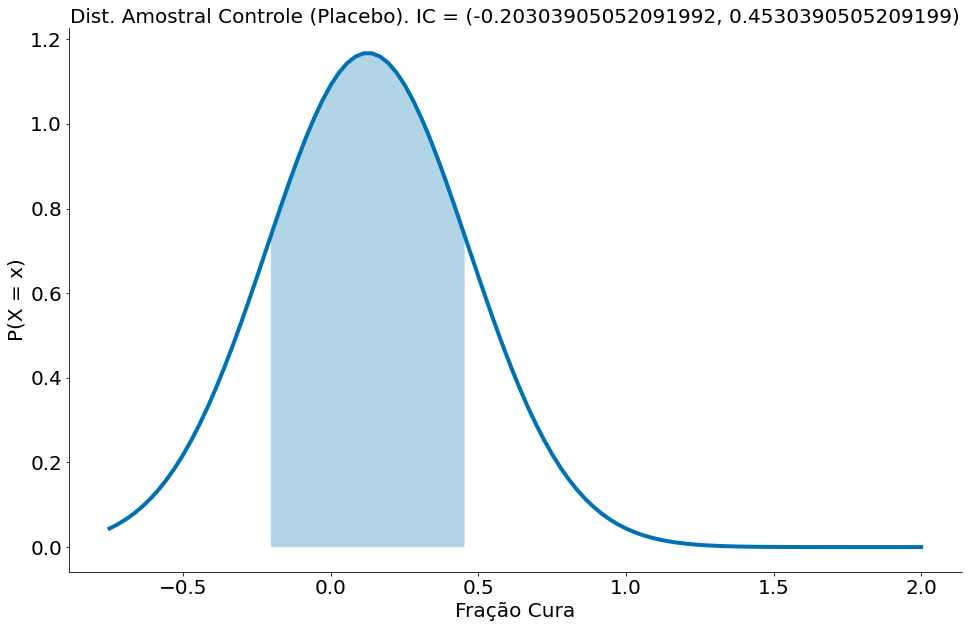

In [33]:
x = np.linspace(-0.75, 2, 100)

y = ss.distributions.norm.pdf(loc=mu_ctrl, scale=std_ctrl, x=x)
plt.plot(x, y, label='Controle')

se = 1.96 * std_ctrl / np.sqrt(len(control))
low = mu_ctrl - 1.96 * se
high = mu_ctrl + 1.96 * se
x_fill = np.linspace(low, high, 100)
y_fill = ss.distributions.norm.pdf(loc=mu_ctrl, scale=std_ctrl, x=x_fill)
plt.fill_between(x_fill, y_fill, alpha=0.3)

plt.xlabel('Fra√ß√£o Cura')
plt.ylabel('P(X = x)')
plt.title('Dist. Amostral Controle (Placebo). IC = ({}, {})'.format(low, high))
despine()

Como temos um segundo grupo, podemos ver qual a chance da **distribui√ß√£o amostral** deste segundo grupo cair na √°rea onde **aceitamos a nula**. Tal valor √© o $\beta$. O mesmo ser√° de uns 33%. 

* $P(H_0|H_1) = \beta = 33\%$. Este √© o caso do $\beta$. Lemos a chance da H0 caso a H1 seja verdade.

Ou seja: caso seja repetido um outro experimento com o mesmo tamanho de amostra $n$, existe 33% de chance do grupo 
de medicados ter uma taxa de cura dentro do IC (regi√£o onde aceiamos a nula, √© esperado) do grupo de controle.

* $P(H_1|H_0) = \alpha = 5\%$. Este √© o caso do $\alpha$. Lemos a chance da H1 caso a H0 seja verdade.

Este valor √© **fixo**. N√£o depende de dados nem de H1. Por isso √© mais simples pensar apenas nele!

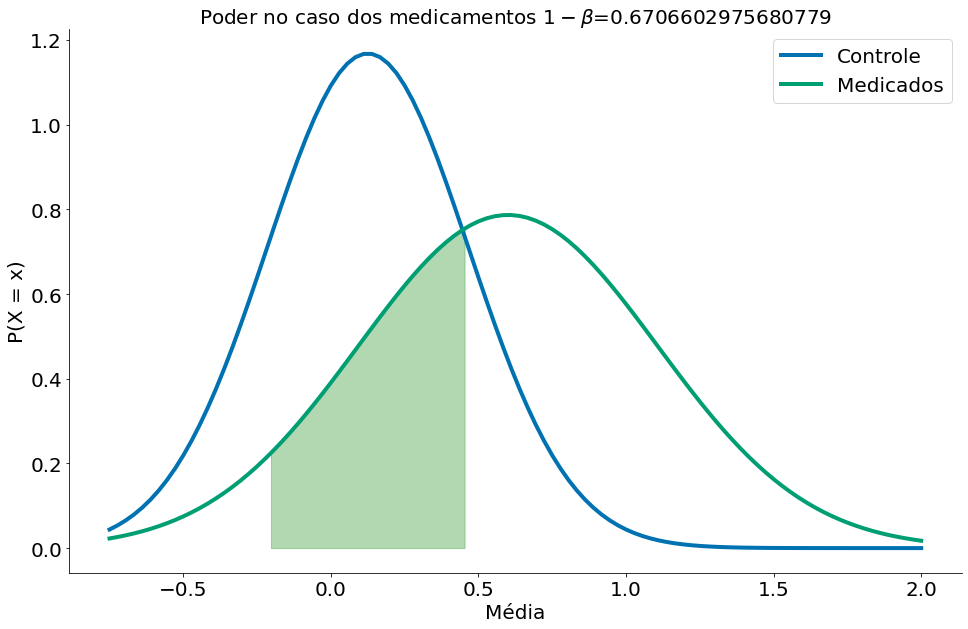

In [34]:
x = np.linspace(-0.75, 2, 100)

y = ss.distributions.norm.pdf(loc=mu_ctrl, scale=std_ctrl, x=x)
plt.plot(x, y, label='Controle')

se = 1.96 * std_ctrl / np.sqrt(len(control))
low = mu_ctrl - 1.96 * se
high = mu_ctrl + 1.96 * se
x_fill = np.linspace(low, high, 100)

y = ss.distributions.norm.pdf(loc=mu_med, scale=std_med, x=x)
plt.plot(x, y, label='Medicados')

x_fill = np.linspace(low, high, 100)
y_fill = ss.distributions.norm.pdf(loc=mu_med, scale=std_med, x=x_fill)
plt.fill_between(x_fill, y_fill, alpha=0.3, color='green')

beta = ss.distributions.norm.cdf(loc=mu_med, scale=std_med, x=high) - \
        ss.distributions.norm.cdf(loc=mu_med, scale=std_med, x=low)

plt.title(r'Poder no caso dos medicamentos $1-\beta$={}'.format(1-beta))

plt.xlabel('M√©dia')
plt.ylabel('P(X = x)')
plt.legend()
despine()

## Dicas

Ao realizar um teste sempre indique:
1. A hip√≥tese nula
1. Qual o tamanho da amostra
1. Qual o tamanho do efeito

Com muitas amostras, at√© efeitos pequenos s√£o significativos. Por√©m, sem muitas consequ√™ncias na pr√°tica!